In [1]:
!pip install sklearn
!pip install pandas

In [1]:
from sklearn.datasets import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier 
digits=load_digits()
digits_d=pd.DataFrame(digits['data'][0:1600])
train_x=digits['data'][0:1600]
train_y=digits['target'][0:1600]

model=KNeighborsClassifier(20)
model.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=20)

In [2]:
model.predict([digits['data'][67]])

array([6])

In [3]:
type(digits['data'][67])

numpy.ndarray

In [4]:
digits['data'][1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

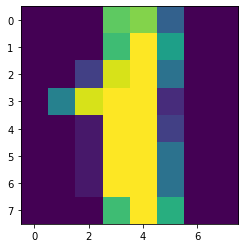

In [5]:
imga=digits['data'][1]
imga= imga.reshape((8,8))
imga= imga.reshape((64,))
imga= imga.reshape((8,8))
plt.imshow(imga)

In [6]:
imga

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

[[  0   0 251 246   0   0   0   0]
 [  0   0 220 183   0   0   0   0]
 [  0   0 226 187   0   0   0   0]
 [  0   0 235 190   0   0   0   0]
 [  0   0 244 169   0   0   0   0]
 [  0   0 252 151 253   0   0   0]
 [  0   0   0 216 253   0   0   0]
 [  0   0   0   0   0   0   0   0]]


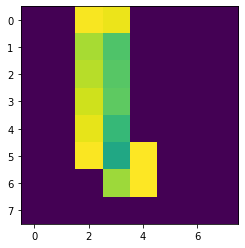

In [10]:
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, Image
import numpy as np
 
def predict_digit(img):
    #resize image to 28x28 pixels
    img = img.resize((8,8))
    #convert rgb to grayscale
    img = img.convert('L')
    img = np.array(img)
    img = img-255
    img = img
    print(img)
    plt.imshow(img)
    #reshaping to support our model input and normalizing
    img = img.reshape(64,)
    #img = img/255.0
    #predicting the class
    res = model.predict([img])[0]
    return res
 
class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
 
        self.x = self.y = 0
        
        # Creating elements
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Draw..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command = self.classify_handwriting)  
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)
      
        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)
        
        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)
 
    def clear_all(self):
        self.canvas.delete("all")
        
    def classify_handwriting(self):
        HWND = self.canvas.winfo_id()  # get the handle of the canvas
        rect = win32gui.GetWindowRect(HWND)  # get the coordinate of the canvas
        a,b,c,d = rect
        rect=(a+4,b+4,c-4,d-4)
        im = ImageGrab.grab(rect)
 
        digit = predict_digit(im)
        self.label.configure(text= str(digit))
  
    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')
      
app = App()
mainloop()

